#### 1. Data preprocessing and analysis

In [1]:
# read data
import pandas as pd
data = pd.read_csv('adult.csv')
# View the first five rows of data
data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# View statistical information of data
data.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
# View missing values in data
# The result shows that there are no missing values in the data and no further processing is required
data.isnull().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64

In [4]:
# View the status of y Income
income = data['Income'].value_counts()
income

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

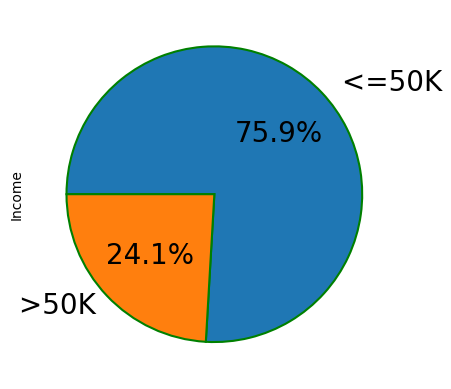

In [5]:
# Draw a picture to view the label situation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
income.plot(kind = 'pie', 
           autopct='%.1f%%', 
           radius = 1, 
           startangle = 180, 
           counterclock = False, 
           wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'}, 
           textprops = {'fontsize': 20, 'color':'black'} 
          )
plt.show()

In [6]:
# # Change y to 0, 1 classification
# data['Income'].replace([' >50K', ' <=50K'], [1, 0], inplace=True)
# data['Income'].value_counts()

##### Visualization

<Axes: xlabel='Workclass,Income'>

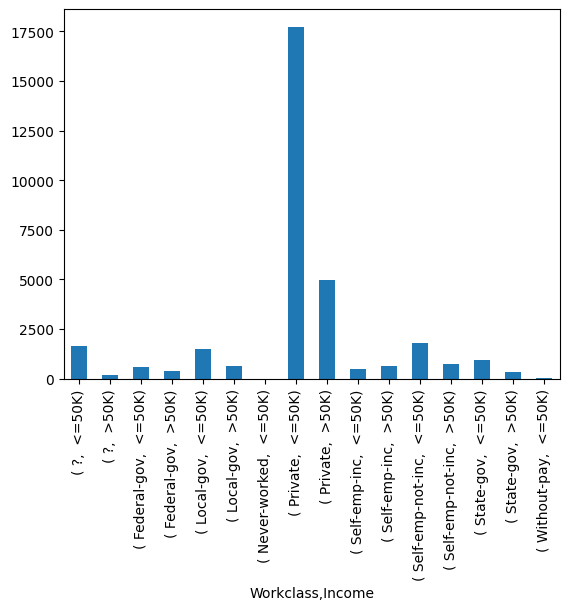

In [7]:
# View the status of Income and Workclass
wc = data.groupby(['Workclass', 'Income'])['Income'].count()
wc.plot(kind='bar')

<Axes: xlabel='Education,Income'>

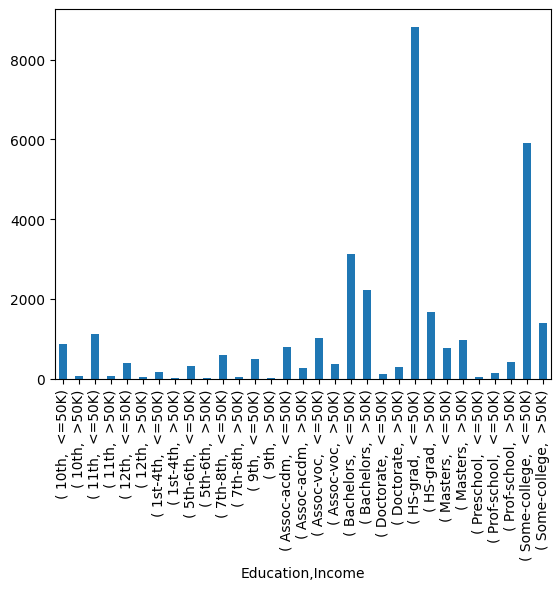

In [8]:
# View the situation of Income and Education
wc = data.groupby(['Education', 'Income'])['Income'].count()
wc.plot(kind='bar')

<Axes: xlabel='Gender,Income'>

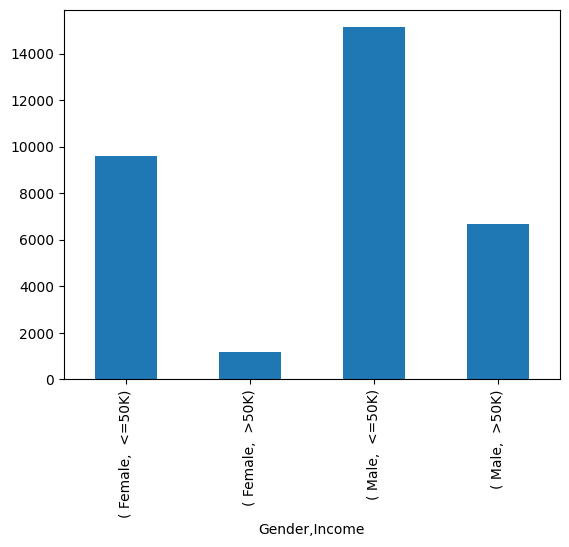

In [9]:
# View the situation of Income and Gender
wc = data.groupby(['Gender', 'Income'])['Income'].count()
wc.plot(kind='bar')

<Axes: xlabel='Race,Income'>

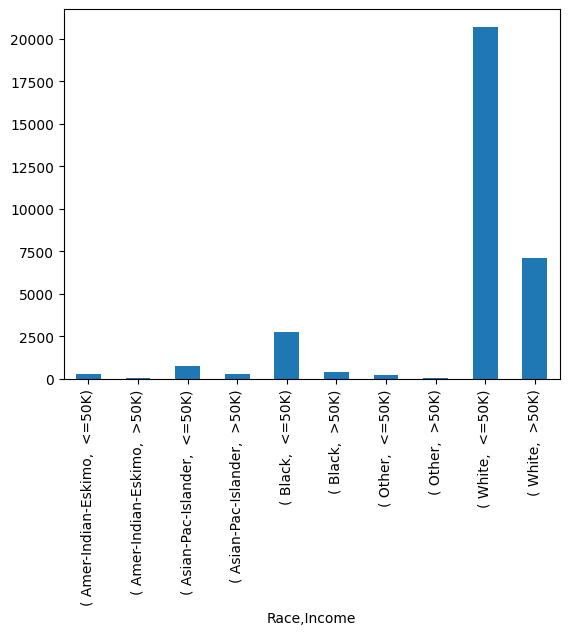

In [10]:
# Check the situation of Income and Race
wc = data.groupby(['Race', 'Income'])['Income'].count()
wc.plot(kind='bar')

/home/fuyingwen/anaconda3/envs/py38/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(36.26946759259259, 0.5, 'Income')

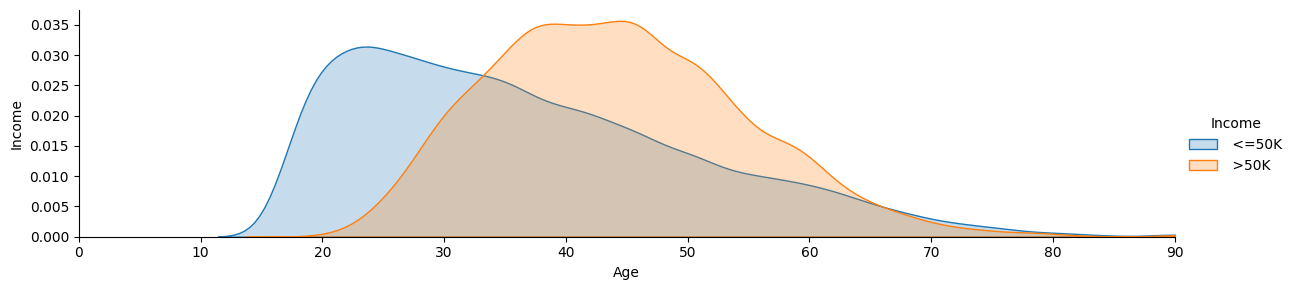

In [11]:
# View the situation of Income and Age
facet = sns.FacetGrid(data, hue="Income",aspect=4)
facet.map(sns.kdeplot,'Age', fill=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('Income')

/home/fuyingwen/anaconda3/envs/py38/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(34.75097800925926, 0.5, 'Income')

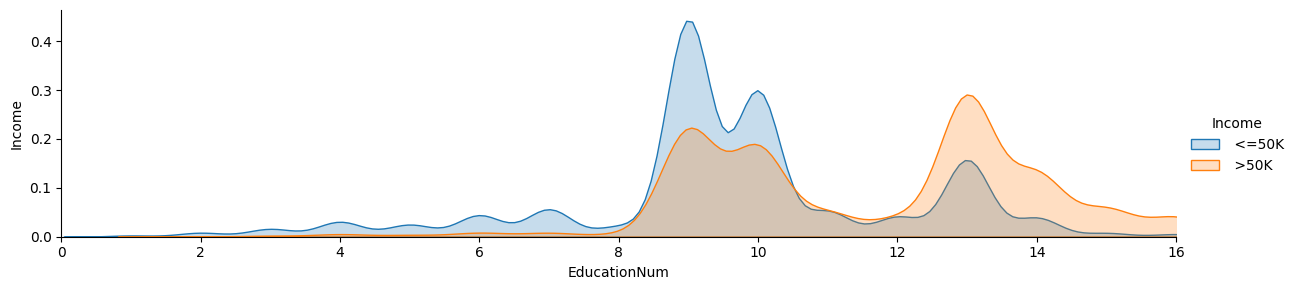

In [12]:
# View the situation of Income and EducationNum
facet = sns.FacetGrid(data, hue="Income",aspect=4)
facet.map(sns.kdeplot,'EducationNum', fill=True)
facet.set(xlim=(0, data['EducationNum'].max()))
facet.add_legend()
plt.xlabel('EducationNum') 
plt.ylabel('Income')

##### Attribute value processing

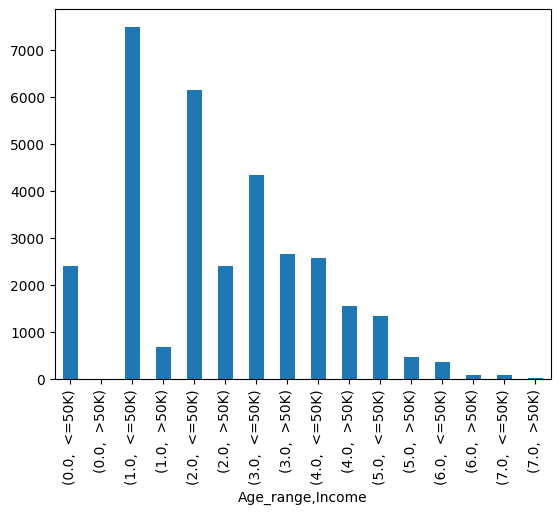

In [13]:
### Continuous age value processing, with a minimum age value of 17 and a maximum age value of 90, divided into 8 intervals
data.loc[(data['Age'] > 10) & (data['Age'] <= 20), 'Age_range'] = 0
data.loc[(data['Age'] > 20) & (data['Age'] <= 30), 'Age_range'] = 1
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'Age_range'] = 2
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'Age_range'] = 3
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'Age_range'] = 4
data.loc[(data['Age'] > 60) & (data['Age'] <= 70), 'Age_range'] = 5
data.loc[(data['Age'] > 70) & (data['Age'] <= 80), 'Age_range'] = 6
data.loc[(data['Age'] > 80) & (data['Age'] <= 90), 'Age_range'] = 7
# View processed data
wc = data.groupby(['Age_range', 'Income'])['Income'].count()
wc.plot(kind='bar')
# Delete Age attribute
data.drop(['Age'], axis=1, inplace=True)

In [14]:
data.columns

Index(['Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income', 'Age_range'],
      dtype='object')

In [15]:
# Processing of Text Attribute Values
# Get all attribute values of Workclass
wl = list(data['Workclass'].value_counts().index)
# Replace from 0- attribute index
data['Workclass'].replace(wl, list(range(len(wl))), inplace=True)

In [16]:
# Other similar
wl = list(data['Education'].value_counts().index)
data['Education'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Marital Status'].value_counts().index)
data['Marital Status'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Occupation'].value_counts().index)
data['Occupation'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Relationship'].value_counts().index)
data['Relationship'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Race'].value_counts().index)
data['Race'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Gender'].value_counts().index)
data['Gender'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Native Country'].value_counts().index)
data['Native Country'].replace(wl, list(range(len(wl))), inplace=True)

wl = list(data['Income'].value_counts().index)
data['Income'].replace(wl, list(range(len(wl))), inplace=True)

In [17]:
# Take a look at the data again
data.head()

,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income,Age_range
0,4,77516,2,13,1,3,1,0,0,2174,0,40,0,0,2.0
1,1,83311,2,13,0,2,0,0,0,0,0,13,0,0,3.0
2,0,215646,0,9,2,9,1,0,0,0,0,40,0,0,2.0
3,0,234721,5,7,0,9,0,1,0,0,0,40,0,0,4.0
4,0,338409,2,13,0,0,4,1,1,0,0,40,9,0,1.0


In [18]:
print(list(data.columns))

['Workclass', 'Final Weight', 'Education', 'EducationNum', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country', 'Income', 'Age_range']


#### 2. Sorter operation

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
kf = StratifiedKFold(n_splits=5) # 5-fold data division, divided according to the proportion of y categories
all_train_X = data[['Workclass', 'Final Weight', 'Education', 'EducationNum', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country', 'Age_range']]
all_train_Y = data[['Income']]

In [21]:
scorelist = [[] for _ in range(3)] # record acc 
scorelist_2 = [[] for _ in range(3)] # record pre
scorelist_3 = [[] for _ in range(3)] # record rec
scorelist_4 = [[] for _ in range(3)] # record f1

In [ ]:
# Five fold cross validation begins
for train_index, test_index in kf.split(all_train_X, all_train_Y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    train_X, train_Y = all_train_X.loc[train_index], all_train_Y.loc[train_index]
    test_X, test_Y = all_train_X.loc[test_index], all_train_Y.loc[test_index]
    
    # Gradient Boosting Classifier
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier(n_estimators=200) #definition model
    model.fit(train_X , train_Y) # train
    pre_Y = model.predict(test_X) #prediction
    scorelist[0].append(model.score(test_X , test_Y))
    scorelist_2[0].append(precision_score(test_Y, pre_Y))
    scorelist_3[0].append(recall_score(test_Y, pre_Y))
    scorelist_4[0].append(f1_score(test_Y, pre_Y))
    
    # Random Forests Model
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(train_X , train_Y)
    pre_Y = model.predict(test_X) #prediction
    scorelist[1].append(model.score(test_X , test_Y))
    scorelist_2[1].append(precision_score(test_Y, pre_Y))
    scorelist_3[1].append(recall_score(test_Y, pre_Y))
    scorelist_4[1].append(f1_score(test_Y, pre_Y))
    
    # K-nearest neighbors
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors = 7)
    model.fit(train_X , train_Y)
    pre_Y = model.predict(test_X) #prediction
    scorelist[2].append(model.score(test_X , test_Y))
    scorelist_2[2].append(precision_score(test_Y, pre_Y))
    scorelist_3[2].append(recall_score(test_Y, pre_Y))
    scorelist_4[2].append(f1_score(test_Y, pre_Y))

In [24]:
# View the average 50% accuracy of different models
import numpy as np
print("------GradientBoostingClassifier------")
print("Accuracy: ", np.mean(scorelist[0]))
print("Precision: ", np.mean(scorelist_2[0]))
print("Recall: ", np.mean(scorelist_3[0]))
print("F1: ", np.mean(scorelist_4[0]))
print()
print("------RandomForestClassifier------")
print("Accuracy: ", np.mean(scorelist[1]))
print("Precision: ", np.mean(scorelist_2[1]))
print("Recall: ", np.mean(scorelist_3[1]))
print("F1: ", np.mean(scorelist_4[1]))
print()
print("------KNeighborsClassifier------")
print("Accuracy: ", np.mean(scorelist[2]))
print("Precision: ", np.mean(scorelist_2[2]))
print("Recall: ", np.mean(scorelist_3[2]))
print("F1: ", np.mean(scorelist_4[2]))

------GradientBoostingClassifier------
Accuracy:  0.8696293723242314
Precision:  0.7870161190348806
Recall:  0.6287471893883797
F1:  0.6990278498005202

------RandomForestClassifier------
Accuracy:  0.850526778097259
Precision:  0.7197564423846523
Recall:  0.6210951040707025
F1:  0.6667933548097638

------KNeighborsClassifier------
Accuracy:  0.7813948465275165
Precision:  0.6088509007393561
Recall:  0.25800230574249594
F1:  0.36242360871744805


### 3. parameter search

In [25]:
# Import dependency packages
from sklearn.model_selection import GridSearchCV

##### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Set the parameters to be searched, max_ Depth, min_ Samples_ Leaf, n_ Estimators
params={'max_depth':[x for x in range(1,8,1)], 'min_samples_leaf':[x for x in range(1,5,1)], 'n_estimators':[x for x in range(50,100,10)]} 
# Set up models and evaluation metrics, and start training models with different parameters
clf = GradientBoostingClassifier()
# 5-fold cross validation search
grid = GridSearchCV(clf, params, cv=5, scoring="accuracy")
grid.fit(all_train_X, all_train_Y)

In [27]:
# Optimal parameters
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 90}

In [28]:
# Optimal result
grid.best_score_

0.8731613507062608

##### Random Forests Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Set the parameters to be searched, max_ Depth, min_ Samples_ Leaf, n_ Estimators
params = {'max_depth':[x for x in range(1,8,1)], 'min_samples_leaf':[x for x in range(1,5,1)], 'n_estimators':[x for x in range(50,100,10)]} 
# Set up models and evaluation metrics, and start training models with different parameters
clf = RandomForestClassifier()
# 5-fold cross validation search
grid = GridSearchCV(clf, params, cv=5, scoring="accuracy")
grid.fit(all_train_X, all_train_Y)

In [31]:
# Optimal parameters
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 70}

In [32]:
# Optimal result
grid.best_score_

0.8570683396346745

##### K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# The main parameter of knn is only n_ Neighbors
params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
clf = KNeighborsClassifier()
# 5-fold cross validation search
grid = GridSearchCV(clf, params, cv=5, scoring="accuracy")
grid.fit(all_train_X, all_train_Y)

In [35]:
# Optimal parameters
grid.best_params_

{'n_neighbors': 15}

In [36]:
# Optimal result
grid.best_score_

0.7970271798116111